# Importing the dependencies

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder   # For encoding featuresfrom sklearn.preprocessing import LabelEncoder   # For encoding features
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from deap import base, creator, tools, algorithms

# Importing the dataset

In [92]:
dt = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

## Inspection

In [93]:
dt.head()  # Displays the first 5 rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [94]:
dt.tail()  # Displays the last 5 rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [95]:
dt.info()  # Summary of the DataFrame including data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [96]:
dt.shape

(374, 13)

In [97]:
dt['Blood Pressure'].value_counts()

Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64

In [98]:
dt['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [99]:
dt.describe()  # Statistical summary of numerical features

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [100]:
dt.isnull().sum()  # Number of missing values in each column

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

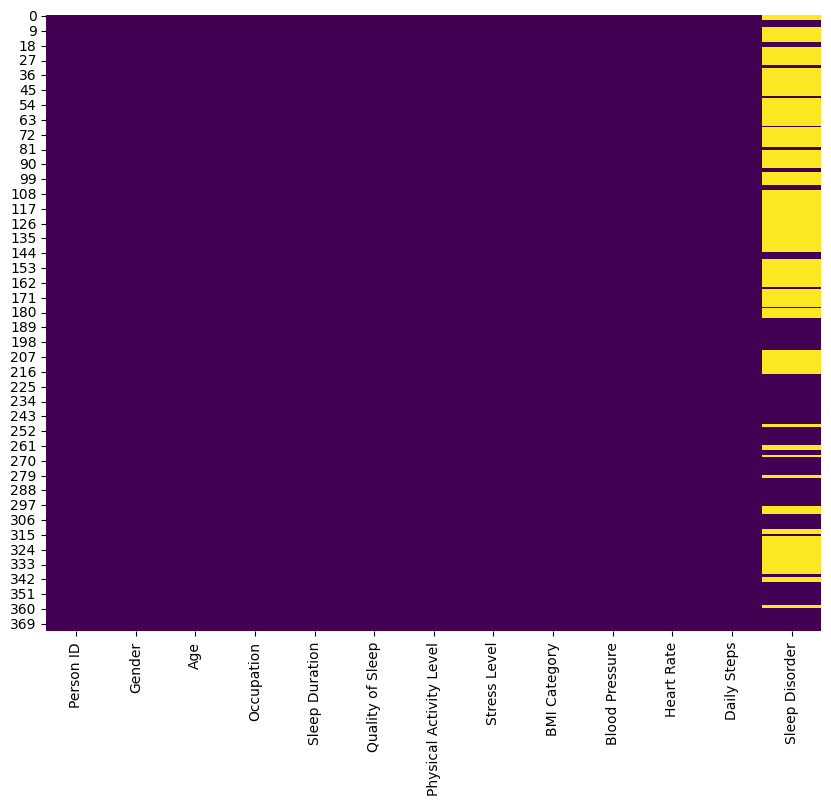

In [101]:
### Visualizing missing values
plt.figure(figsize=(10, 8))
sns.heatmap(dt.isnull(), cbar=False, cmap='viridis')
plt.show()
## There is no missing value so we will get blank graph

In [102]:
dt = dt.dropna()

In [103]:
dt= dt.drop('Blood Pressure', axis=1)

In [104]:
# Finding duplicates
dt.duplicated().sum()  # Number of duplicate rows

0

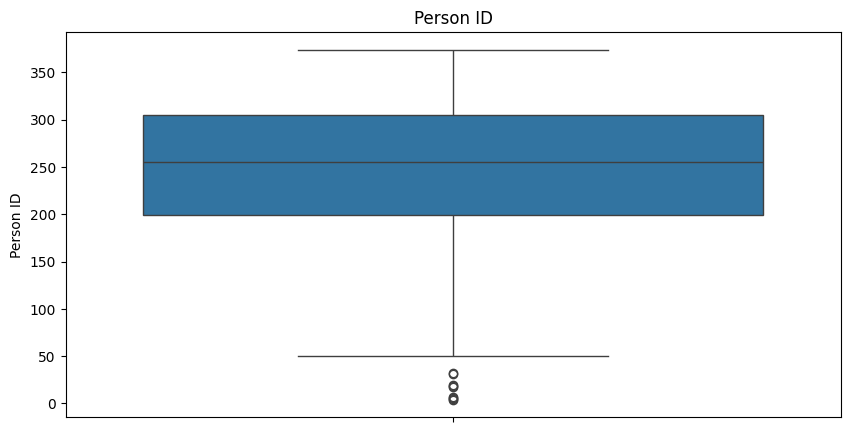

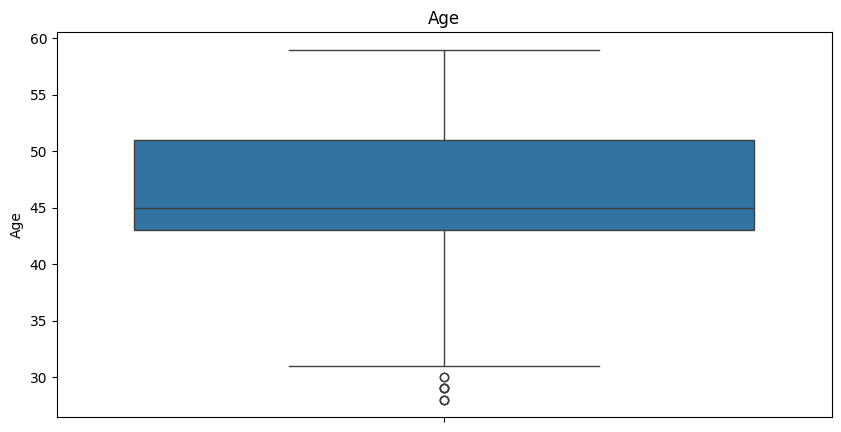

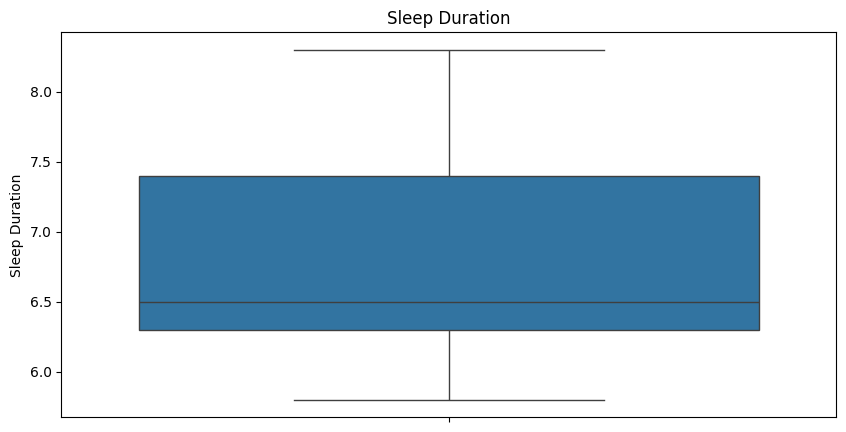

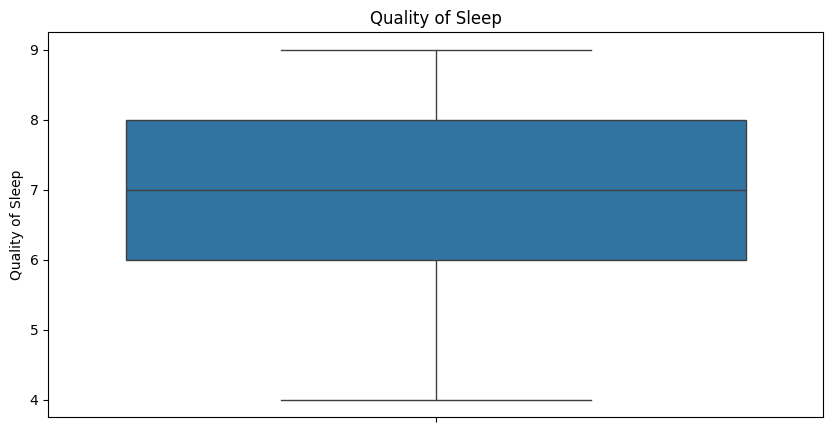

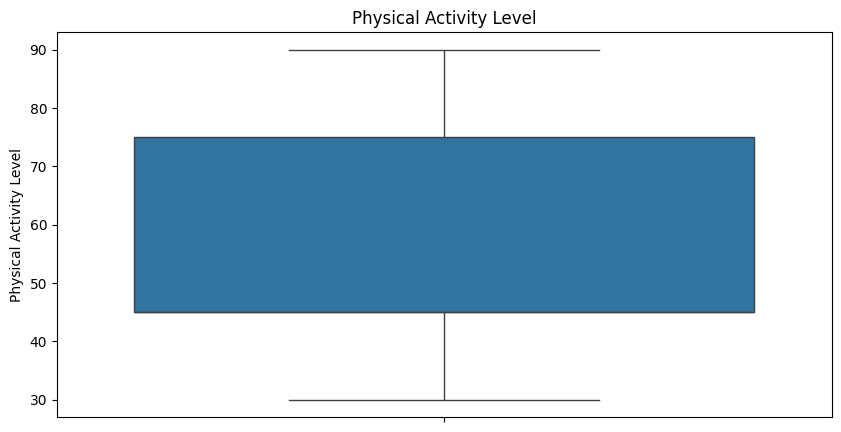

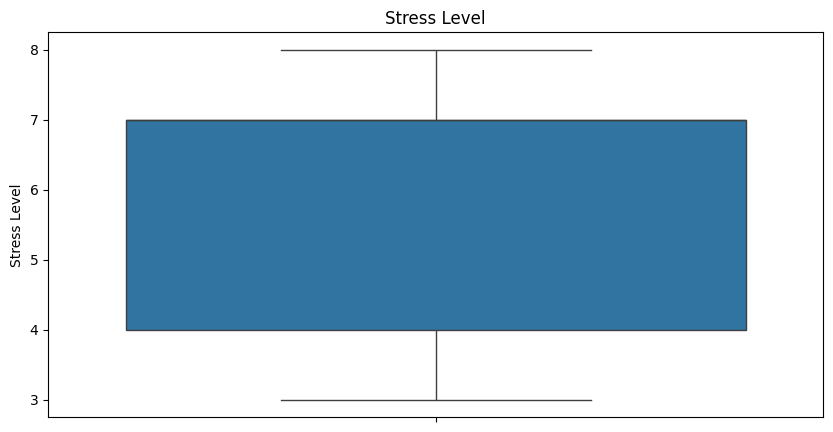

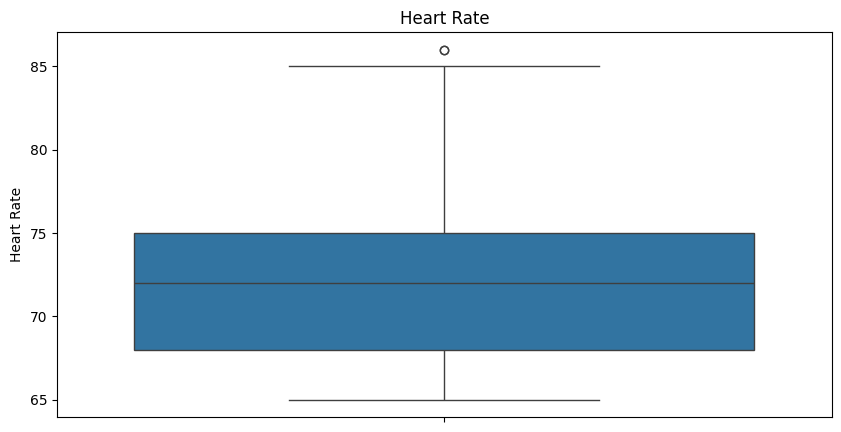

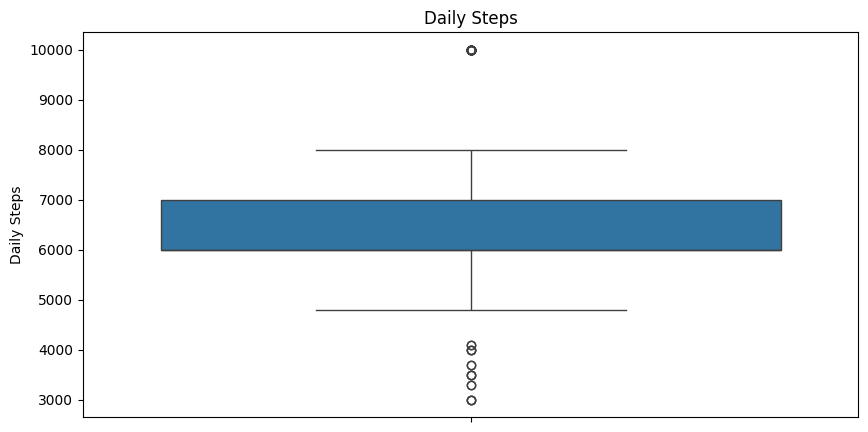

In [105]:
## Boxplot- For visualizing outliers
for col in dt.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(dt[col])
    plt.title(col)
    plt.show()

In [106]:
# for insulin column
Q1 = dt['Daily Steps'].quantile(0.25)
Q3 = dt['Daily Steps'].quantile(0.75)
IQR = Q3 - Q1
dt = dt[(dt['Daily Steps'] >= (Q1 - 1.5 * IQR)) & (dt['Daily Steps'] <= (Q3 + 1.5 * IQR))]

## Encoding categorical features

In [107]:
categ = ['Gender','Occupation','BMI Category','Sleep Disorder']

# Encode Categorical Columns
le = preprocessing.LabelEncoder()
dt[categ] = dt[categ].apply(le.fit_transform)
dt.sample(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
246,247,1,44,5,6.3,6,45,7,1,72,6000,0
365,366,0,59,4,8.0,9,75,3,1,68,7000,1
344,345,0,57,4,8.2,9,75,3,1,68,7000,1
224,225,0,44,7,6.6,7,45,4,1,65,6000,0
195,196,1,43,5,6.5,6,45,7,1,72,6000,0
223,224,1,44,5,6.4,6,45,7,1,72,6000,0
237,238,0,44,7,6.5,7,45,4,1,65,6000,0
258,259,0,45,7,6.6,7,45,4,1,65,6000,0
259,260,0,45,7,6.6,7,45,4,1,65,6000,0
238,239,1,44,5,6.3,6,45,7,1,72,6000,0


# Splitting the dataset

In [108]:
# Define features and target
X = dt.drop(['Sleep Disorder'], axis=1)
y = dt['Sleep Disorder']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Min-Max scale features

In [109]:
ms = MinMaxScaler()
ms_x_train = ms.fit_transform(X_train)
ms_x_test = ms.transform(X_test)

### Custom wrapper for Keras model

In [127]:
class KerasClassifier:
    def __init__(self, build_fn, epochs=100, batch_size=10, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
    
    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

### Genetic Algorithm parameters

In [128]:
POP_SIZE = 50
N_GEN = 20
MUT_PROB = 0.2
CX_PROB = 0.8

### Define fitness function

In [129]:
def evaluate(individual):
    # Decode individual to feature subset
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if not selected_features:
        return 0,
    
    # Evaluate models
    models = {
        'SVM': SVC(probability=True, random_state=42),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'ANN': create_ann(input_dim=len(selected_features))
    }

    accuracy_scores = []
    
    for model_name, model in models.items():
        accuracy = train_model(model, X_train[:, selected_features], X_test[:, selected_features], y_train, y_test)
        accuracy_scores.append(accuracy)

    # Return the mean accuracy of all models
    return np.mean(accuracy_scores),

# Training model function
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


### Create ANN model

In [130]:
def create_ann(input_dim):
    def build_model():
        model = Sequential()
        model.add(Dense(12, input_dim=input_dim, activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
        return model
    return KerasClassifier(build_fn=build_model, epochs=100, batch_size=10, verbose=0)

### Defining genetic algorithm components

In [131]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X_train.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

### Run genetic algorithm

In [132]:
# Run genetic algorithm
population = toolbox.population(n=POP_SIZE)
algorithms.eaSimple(population, toolbox, cxpb=CX_PROB, mutpb=MUT_PROB, ngen=N_GEN, verbose=True)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]

print("Best individual is:", best_individual)
print("Selected features are:", selected_features)

InvalidIndexError: (slice(None, None, None), [2, 8, 9])